# Classificação do IDH

Seguindo as classes de classificação abaixo nós utilizamos a árvore de decisão ID3 para classificar a coluna IDM

    0,800 – 1,000 (muito alto)
    0,700 – 0,799 (alto)
    0,555 – 0,699 (médio)
    0,350 – 0,554 (baixo)
    0,0 – 0,349 (muito baixo)

O target ou variável independente `y` foi a coluna `IDHM`.

As variáveis dependentes `x` foram as respectivas colunas `PopEstimada_2018`, `PopCenso_2010`, `ReceitasRealizadas_2014`, `DespesasEmpenhadas_2014`, `Pib_2014`, `RegiaoBrasil_CO`, `RegiaoBrasil_N`, `RegiaoBrasil_NE`, `RegiaoBrasil_SE` e `RegiaoBrasil_SUL`.

Sendo as últimas 5 colunas geradas através do `get_dummies` para normalizar o valor das strings.


In [81]:
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

columns=['PopEstimada_2018','PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014','RegiaoBrasil_CO','RegiaoBrasil_N','RegiaoBrasil_NE','RegiaoBrasil_SE','RegiaoBrasil_SUL']

In [82]:
# Carregando os datos formatados
data = pd.read_csv (r'data/DATA_F_rank.csv')
df = pd.DataFrame(data, columns=columns)
df

,PopEstimada_2018,PopCenso_2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014,RegiaoBrasil_CO,RegiaoBrasil_N,RegiaoBrasil_NE,RegiaoBrasil_SE,RegiaoBrasil_SUL
0,23167,24392,3,53490,47577,16461.11,0,1,0,0,0
1,5438,6313,3,22635,19354,18346.17,0,1,0,0,0
2,84813,78574,4,169636,155473,20725.23,0,1,0,0,0
3,16444,17029,3,53147,46774,22179.17,0,1,0,0,0
4,16227,18591,3,34612,34381,15300.88,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4613,13746,12548,4,37777,33220,23237.24,1,0,0,0,0
4614,8611,7371,3,26783,23511,39480.36,1,0,0,0,0
4615,6026,4735,3,17295,15646,18992.37,1,0,0,0,0
4616,5758,5145,3,19148,16785,35691.39,1,0,0,0,0


In [83]:
# Embaralhando dados
df = df.sample(frac = 1).reset_index(drop = True)

# Removendo a coluna IDHM do dataset e a transformando no target
target = df.pop('IDHM')

# Representando as strings como inteiros 
# target = target.astype('int')

# Treino 90% e teste 10%
qtd_treino = int(len(df) * 0.9)
x_treinamento = df[:qtd_treino]
x_teste = df[qtd_treino:]
y_treinamento = target[:qtd_treino]
y_teste = target[qtd_treino:]
df

,PopEstimada_2018,PopCenso_2010,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014,RegiaoBrasil_CO,RegiaoBrasil_N,RegiaoBrasil_NE,RegiaoBrasil_SE,RegiaoBrasil_SUL
0,20538,16317,32430,29916,8009.33,0,1,0,0,0
1,14769,13750,28378,25130,12390.03,0,0,0,1,0
2,17484,15936,68129,56228,57858.00,0,0,0,0,1
3,5330,4846,37619,31163,52583.62,0,0,0,1,0
4,2558,2553,11031,8812,9184.72,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4613,12164,10263,22438,19173,12845.74,0,0,0,1,0
4614,21397,20659,42797,39889,12383.22,0,0,1,0,0
4615,29559,28451,52462,49467,15245.21,0,0,1,0,0
4616,6565,6173,16405,15505,7158.10,0,0,1,0,0


In [84]:
# Árvore de decisão com o critério de entropia
clf = tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20, class_weight='balanced')

In [85]:
# Treinamento
IDH_Tree = clf.fit(x_treinamento, y_treinamento)

In [86]:
# Predição
y_pred = IDH_Tree.predict(x_teste)

In [87]:
print(y_pred)
print(y_teste)

[4 5 4 3 4 2 4 3 4 3 2 3 2 2 4 3 3 4 3 2 4 4 3 3 3 4 2 3 2 4 3 3 4 3 4 3 4
 3 4 3 4 3 2 4 2 4 4 4 2 2 4 4 4 2 2 2 4 4 4 5 5 3 2 3 3 4 3 3 3 4 2 2 3 4
 3 3 4 3 4 3 4 3 3 4 2 2 4 3 2 4 3 5 4 3 2 3 4 2 3 3 3 4 4 2 4 2 5 4 4 2 4
 4 2 2 4 4 4 4 4 4 5 2 4 4 3 5 3 4 4 2 3 4 2 2 4 4 2 5 3 2 4 2 3 5 5 3 2 4
 3 3 4 4 3 2 3 5 4 3 2 2 3 3 2 3 4 3 4 5 2 4 3 3 3 5 2 3 4 2 2 3 5 4 5 2 5
 2 2 4 4 2 3 3 4 5 4 4 5 2 3 2 2 3 4 4 3 2 3 4 4 2 4 4 4 4 3 4 2 3 2 4 2 2
 3 4 4 4 3 2 4 2 4 2 4 4 4 2 2 3 4 3 2 4 4 4 4 4 3 2 3 3 3 4 2 4 3 4 4 3 3
 4 4 3 4 4 3 2 4 4 2 4 2 3 2 3 2 3 4 2 2 2 2 3 5 4 2 4 3 4 4 4 2 2 3 2 2 2
 4 2 3 3 3 3 3 4 4 5 3 3 5 4 4 2 3 4 4 2 2 3 3 2 3 4 4 2 4 2 2 2 2 4 4 2 4
 4 2 4 4 4 3 3 3 3 3 3 5 4 3 2 3 2 4 2 4 3 3 3 4 4 3 4 2 2 3 3 4 4 5 2 4 2
 4 4 3 4 2 2 2 4 2 2 3 3 3 2 3 4 4 4 4 2 4 4 4 4 4 4 2 4 4 3 2 2 4 2 2 4 4
 3 3 4 3 2 4 4 4 3 4 3 3 4 2 3 2 2 2 5 2 4 4 2 3 2 4 4 4 5 2 2 4 3 3 4 4 3
 4 4 4 4 2 2 2 4 4 4 2 2 5 3 3 3 2 4]
4156    4
4157    4
4158    4
4159    4
4160    4
       ..
46

In [88]:
#Geração da Matriz de Confusão
MC = confusion_matrix(y_teste, y_pred)
print(MC)

[[ 27   4   0   0]
 [ 99 111  61   4]
 [  0  15 119  21]
 [  0   0   0   1]]


In [89]:
print('Acuracia:', accuracy_score(y_teste, y_pred))
print('Precisão:', precision_score(y_teste, y_pred, average='micro'))
print('Recall:  ', recall_score(y_teste, y_pred, average='micro'))

Acuracia: 0.5584415584415584
Precisão: 0.5584415584415584
Recall:   0.5584415584415584


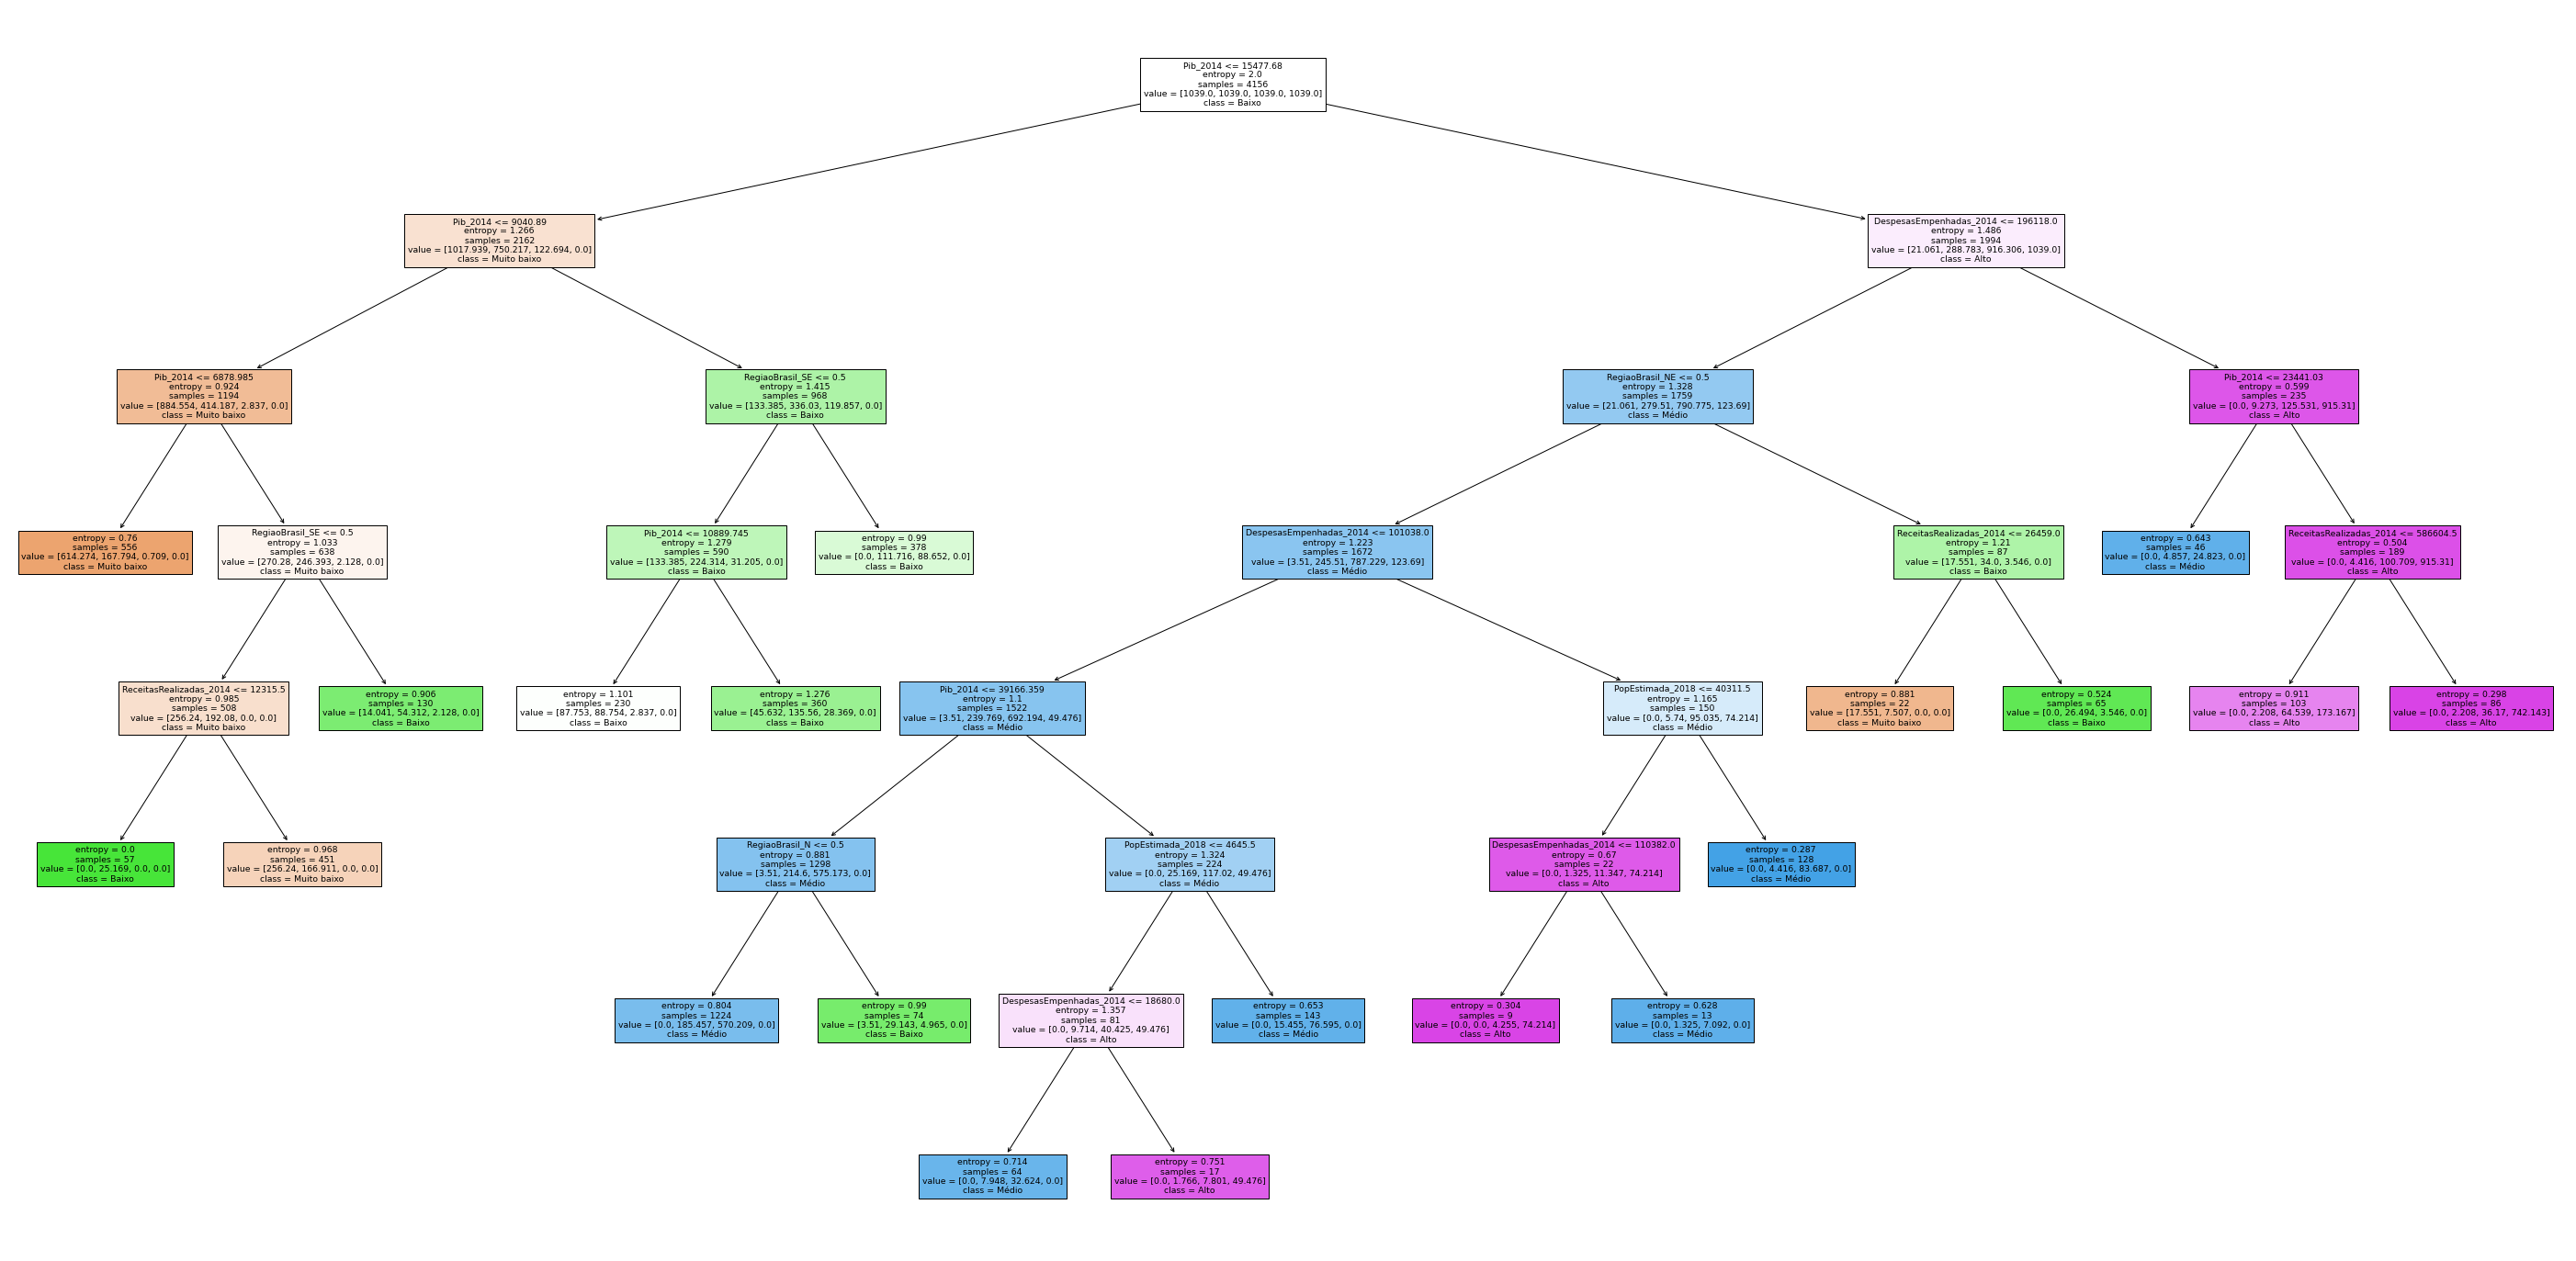

In [90]:
#Columns_X
columnsX=['PopEstimada_2018','PopCenso_2010','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014','RegiaoBrasil_CO','RegiaoBrasil_N','RegiaoBrasil_NE','RegiaoBrasil_SE','RegiaoBrasil_SUL']
#Tipos de Rank de IDH Médio
IDH_variations=['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
#Tamanho da figure
plt.figure(figsize=(50, 25))
#Plotagem da Árvore de Decisão
tree.plot_tree(clf, filled=True, class_names=IDH_variations, feature_names=columnsX)
#Salva a figura
plt.savefig('src/tree.png', facecolor='white', edgecolor='none')

# Conclusão
Os valores encontrados foram relativamente satisfatórios, a árvore final possue diferentes resultados das classes criadas e os valores de Acurácia, Precisão e Recall ficaram no limite para serem descartados.
Os atributos mais relevantes para a classificação são: PIB_2014, DespesasEmpenhadas_2014, se a região é do Nordeste, População estimada de 2018 e se a região é Norte.